<a href="https://colab.research.google.com/github/sujeengim/mini-ai-study/blob/main/Hyperparameter%20Tuning/Hyperparameter_Tuning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 모델링 및 하이퍼파라미터 튜닝 실습2 [분류]
항공사 고객만족 여부 데이터셋 활용하여 고객만족을 예측한다.

## 1. 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

cdf = pd.read_csv('/content/drive/MyDrive/study/aice/실습/자료/Invistico_Airline.csv')

cdf = cdf[:5000]

cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [3]:
# 모든 컬럼 표시하기
pd.set_option('display.max_columns', None)
cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


## 2. 데이터 전처리 하기

- 레이블 불균형 확인하기

In [4]:
cdf.satisfaction.value_counts()

,count
satisfaction,
satisfied,2869
dissatisfied,2131


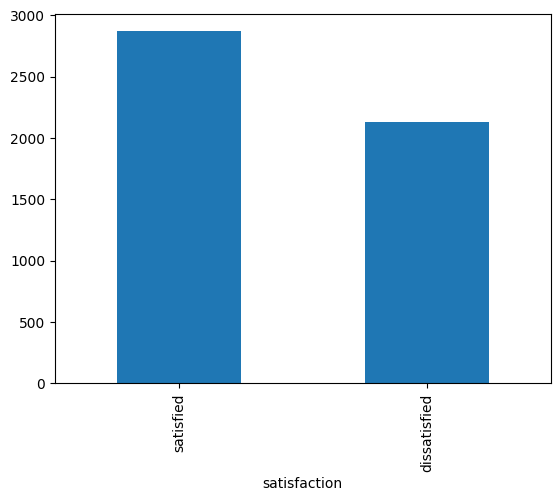

In [5]:
# 데이터 분포도 확인
import matplotlib.pyplot as plt

cdf['satisfaction'].value_counts().plot(kind='bar')
plt.show()

'''
plot(kind=) 종류:
bar, line, barh, hist, box, kde, density, area, pie, scatter, hexbin
'''

In [ ]:
# 위와 동일한 코드
'''
import seaborn as sns
counts = cdf['satisfaction'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
'''

- null 데이터 처리

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       5000 non-null   object 
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   int64  
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

In [7]:
cdf.dropna(axis=0, inplace=True)
# cdf.dropna(subset=['a'], inplace=True)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4973 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       4973 non-null   object 
 1   Gender                             4973 non-null   object 
 2   Customer Type                      4973 non-null   object 
 3   Age                                4973 non-null   int64  
 4   Type of Travel                     4973 non-null   object 
 5   Class                              4973 non-null   object 
 6   Flight Distance                    4973 non-null   int64  
 7   Seat comfort                       4973 non-null   int64  
 8   Departure/Arrival time convenient  4973 non-null   int64  
 9   Food and drink                     4973 non-null   int64  
 10  Gate location                      4973 non-null   int64  
 11  Inflight wifi service              4973 non-null   int64  
 1

- 학습 데이터 만들기

In [8]:
y = cdf.satisfaction
y.head()

,satisfaction
0,satisfied
1,satisfied
2,satisfied
3,satisfied
4,satisfied


In [9]:
x = cdf.drop('satisfaction',axis=1)
x.shape, y.shape

((4973, 22), (4973,))

- 원핫인코딩

In [10]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4973 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4973 non-null   object 
 1   Customer Type                      4973 non-null   object 
 2   Age                                4973 non-null   int64  
 3   Type of Travel                     4973 non-null   object 
 4   Class                              4973 non-null   object 
 5   Flight Distance                    4973 non-null   int64  
 6   Seat comfort                       4973 non-null   int64  
 7   Departure/Arrival time convenient  4973 non-null   int64  
 8   Food and drink                     4973 non-null   int64  
 9   Gate location                      4973 non-null   int64  
 10  Inflight wifi service              4973 non-null   int64  
 11  Inflight entertainment             4973 non-null   int64  
 1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [13]:
x_gd = pd.get_dummies(
    x,
    columns=['Gender','Customer Type','Type of Travel','Class'],
    drop_first=False #분류에서는 false
)
x_gd.info()
x_gd.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4973 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4973 non-null   int64  
 1   Flight Distance                    4973 non-null   int64  
 2   Seat comfort                       4973 non-null   int64  
 3   Departure/Arrival time convenient  4973 non-null   int64  
 4   Food and drink                     4973 non-null   int64  
 5   Gate location                      4973 non-null   int64  
 6   Inflight wifi service              4973 non-null   int64  
 7   Inflight entertainment             4973 non-null   int64  
 8   Online support                     4973 non-null   int64  
 9   Ease of Online booking             4973 non-null   int64  
 10  On-board service                   4973 non-null   int64  
 11  Leg room service                   4973 non-null   int64  
 1

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,True,False,True,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,False,True,True,True,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,True,False,True,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,True,False,True,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,True,False,True,True,False,True,False


- 레이블 인코딩

    - fit(): 데이터를 보고 **"학습"**하는 단계입니다. LabelEncoder라면 "어떤 카테고리가 있는지(예: '만족', '불만족') 파악하고 숫자를 매칭($0, 1$)"하는 기준을 세우는 과정입니다.
    - transform(): 세워진 기준에 맞춰 데이터를 실제 숫자로 **"변환"**하는 단계입니다.
    - fit_transform(): 위 두 과정을 동시에 수행합니다.

In [14]:
# ❤️
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_gd, y,
    stratify=y,
    test_size=0.2,
    random_state=2023
)

le = LabelEncoder()
le.fit(y_train)
le_y_train = le.transform(y_train)
le_y_test = le.transform(y_test)


print(f'레이블 인코딩 후 데이터 ',le_y_train)
print(f'레이블 인코딩 클래스 확인 ', le.classes_)
print(f'레이블 인코딩을 디코딩 했을 때 ', le.inverse_transform(le_y_train))

레이블 인코딩 후 데이터  [1 1 1 ... 0 1 1]
레이블 인코딩 클래스 확인  ['dissatisfied' 'satisfied']
레이블 인코딩을 디코딩 했을 때  ['satisfied' 'satisfied' 'satisfied' ... 'dissatisfied' 'satisfied'
 'satisfied']


## 3. 모델 학습하기

In [17]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

lr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
etc = ExtraTreesClassifier(random_state=1)
xgbc = XGBRFClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)

lr.fit(x_train, le_y_train)
dtc.fit(x_train, le_y_train)
rfc.fit(x_train, le_y_train)
gbc.fit(x_train, le_y_train)
etc.fit(x_train, le_y_train)
xgbc.fit(x_train, le_y_train)
lgbmc.fit(x_train, le_y_train)

models = [lr, dtc, rfc, gbc, etc, xgbc, lgbmc]

acc_train_list = []
acc_test_list = []

for model in models:
    acc_train_list.append(round(model.score(x_train, le_y_train), 5))
    acc_test_list.append(round(model.score(x_test, le_y_test), 5))

for i in range(len(models)):
    print('학습모델:', models[i])
    print('훈련데이터 정확도:', acc_train_list[i])
    print('테스트데이터 정확도:', acc_test_list[i])
    print('---------------')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2284, number of negative: 1694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 3978, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574158 -> initscore=0.298836
[LightGBM] [Info] Start training from score 0.298836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain